In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

MFCC_DIR = Path('MFCC-files/')

In [161]:
df = pd.read_csv(MFCC_DIR / '05-MFCC.csv', header=None)
# df.describe()

In [162]:
df = df.transpose()
len(df)

21126

In [163]:
COLS = len(df.columns)
print(COLS)
df

20


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-418.48000,134.766240,2.626810,-21.323338,22.312069,29.079994,7.538061,3.851788,5.976318,-4.258420,-11.583037,-6.857969,-1.742800,-3.591608,-7.130677,-4.901564,3.238728,8.444813,3.686886,-5.259263
1,-399.60483,148.524920,-2.128265,-24.805637,28.135742,30.505373,0.071327,-1.027987,5.926413,-5.829715,-11.831057,-3.247251,-0.973314,-5.524043,-4.319493,0.350117,4.566829,7.450075,2.083207,-8.409768
2,-401.48956,149.348630,3.656887,-18.188307,33.360863,31.813354,-5.581029,-8.483551,5.278014,-2.465994,-12.496934,-5.061634,2.466172,-0.775390,-3.320422,1.340154,7.261789,6.360527,-3.168479,-11.382816
3,-406.42395,146.963030,7.937378,-13.677288,35.179222,33.489456,-3.859393,-7.910658,6.781340,-0.243907,-15.167213,-13.605923,-4.936214,-3.813900,-6.122549,-2.617958,4.889249,5.127290,-5.322952,-14.205949
4,-406.82153,146.482830,6.562617,-17.891598,28.746410,29.021890,-3.790289,-6.260428,6.250435,-1.714005,-14.611926,-12.196476,-5.462772,-5.665349,-8.129169,-7.066678,-2.943285,-1.058969,-5.694245,-12.422527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21121,-334.78570,184.488830,-12.149527,-6.490153,31.530022,-3.066685,-12.844193,3.286943,-2.380959,-11.021458,-9.592079,-3.689652,-1.340092,-8.349562,-11.770641,-9.018145,-6.971944,-1.490600,-1.363500,-6.275560
21122,-338.85470,171.273640,-25.312986,-7.905975,30.801147,-1.043041,-1.730636,11.641825,0.180487,-8.034616,-7.648555,-3.314857,0.491393,-4.730067,-10.122413,-9.849125,-5.467012,-1.953330,-6.814218,-5.254075
21123,-339.80746,166.114550,-26.683610,-2.723091,29.799873,-1.254530,2.887880,9.950672,-5.170273,-11.335018,-10.195892,-6.554767,-4.062249,-5.393459,-7.612394,-10.635731,-5.848687,-0.858762,-6.361083,-2.393844
21124,-402.00143,138.119810,-2.232697,-6.217731,21.192066,-0.094222,-6.086455,5.979561,-3.664115,-13.214830,-8.533479,-7.253046,-7.100688,-3.924076,-5.692787,-6.656810,-1.209645,-0.588514,-5.384750,-2.103839


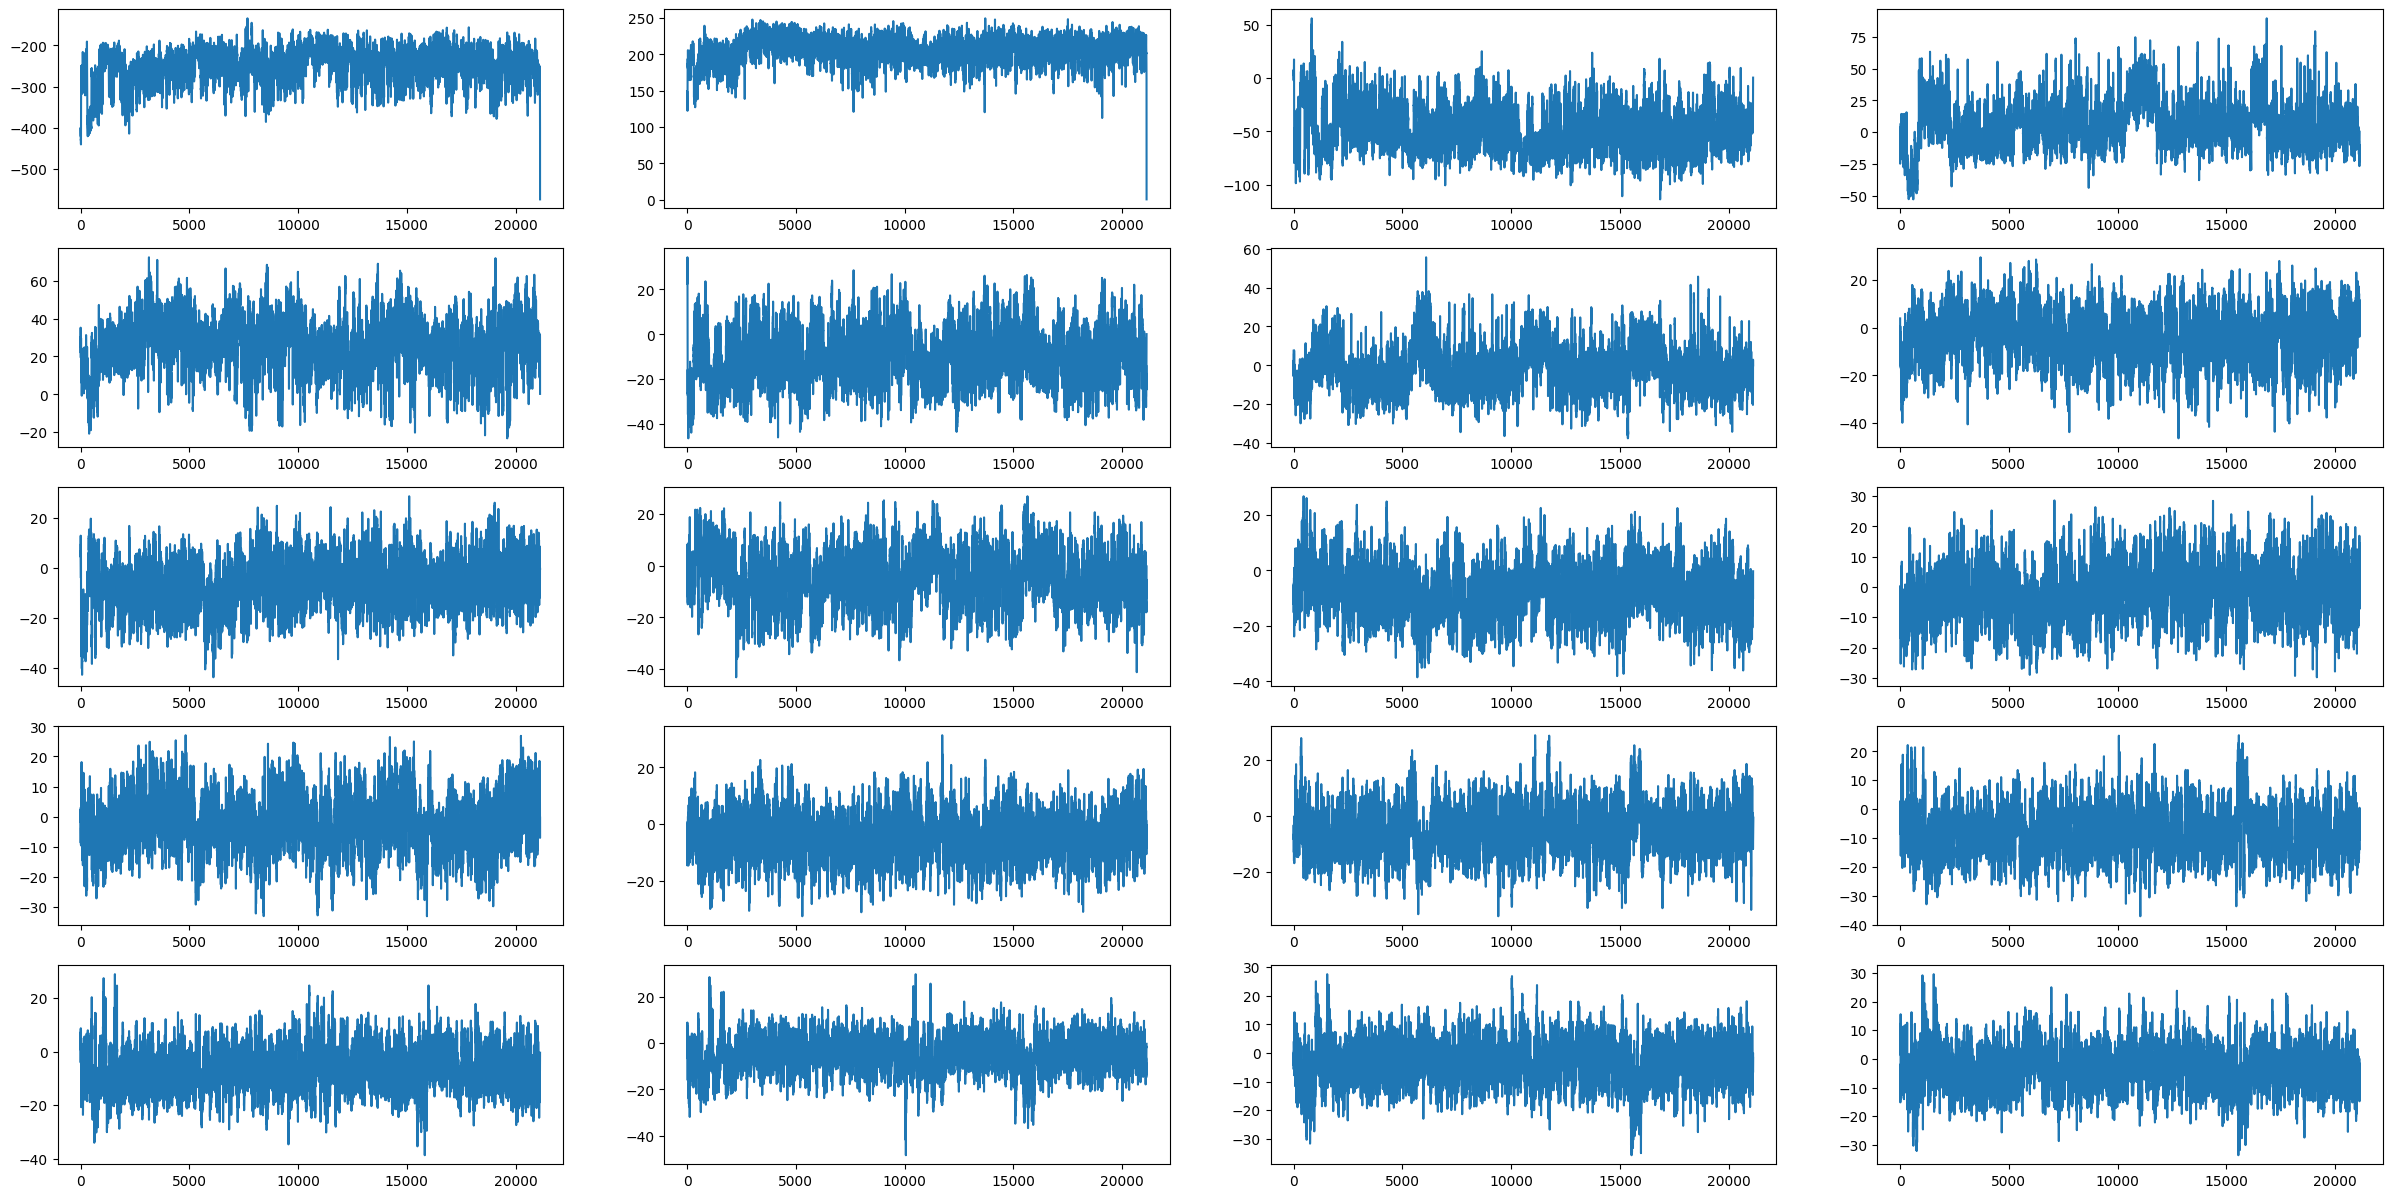

In [164]:
fig = plt.figure(figsize=(30, 15))
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.plot(df[i])
plt.show()

In [165]:
threshold = 3
window_size = 500

def clean_column(n):
    # Check if column `n` exists
    if n not in df.columns:
        print(f"Column {n} does not exist in DataFrame.")
        return

    mean = df[n].mean()
    std = df[n].std()

    # Calculate z-scores
    if std == 0:
        df[f'{n}_z_score'] = np.zeros(len(df)) 
    else:
        df[f'{n}_z_score'] = (df[n] - mean) / std

    cleaned_moving_avg = []
    without_outliers = []

    for i in range(len(df)):
        if np.abs(df[f'{n}_z_score'][i]) > threshold:
            cleaned_moving_avg.append(np.nan)
        else:
            cleaned_moving_avg.append(df[n][i])
            without_outliers.append(df[n][i])

    # Calculate moving average using non-outlier values
    df[f'{n}_moving_avg'] = df[n].rolling(window=window_size, center=True, min_periods=1).mean()

    cleaned_column = []
    for i in range(len(df)):
        if np.abs(df[f'{n}_z_score'][i]) > threshold:
            # Check if there are non-outlier values available
            if without_outliers:
                # Use the moving average or the mean of non-outliers
                cleaned_column.append(df[f'{n}_moving_avg'][i])
            else:
                cleaned_column.append(np.nan)
        else:
            cleaned_column.append(df[n][i])

    df[f'{n}_cleaned'] = cleaned_column

In [166]:
for i in tqdm(range(20)):
    clean_column(i)

100%|██████████| 20/20 [00:15<00:00,  1.26it/s]


In [167]:
df.head(50)

,0,1,2,3,4,5,6,7,8,9,...,16_cleaned,17_z_score,17_moving_avg,17_cleaned,18_z_score,18_moving_avg,18_cleaned,19_z_score,19_moving_avg,19_cleaned
0,-418.48000,134.766240,2.626810,-21.323338,22.312069,29.079994,7.538061,3.851788,5.976318,-4.258420,...,3.238728,1.853615,-7.622420,8.444813,1.035631,-2.829933,3.686886,-0.292067,0.369669,-5.259263
1,-399.60483,148.524920,-2.128265,-24.805637,28.135742,30.505373,0.071327,-1.027987,5.926413,-5.829715,...,4.566829,1.716810,-7.626417,7.450075,0.810700,-2.842143,2.083207,-0.736035,0.389572,-8.409768
2,-401.48956,149.348630,3.656887,-18.188307,33.360863,31.813354,-5.581029,-8.483551,5.278014,-2.465994,...,7.261789,1.566966,-7.638914,6.360527,0.074101,-2.852078,-3.168479,-1.154996,0.405827,-11.382816
3,-406.42395,146.963030,7.937378,-13.677288,35.179222,33.489456,-3.859393,-7.910658,6.781340,-0.243907,...,4.889249,1.397361,-7.647497,5.127290,-0.228085,-2.861004,-5.322952,-1.552831,0.422207,-14.205949
4,-406.82153,146.482830,6.562617,-17.891598,28.746410,29.021890,-3.790289,-6.260428,6.250435,-1.714005,...,-2.943285,0.546573,-7.658868,-1.058969,-0.280162,-2.878847,-5.694245,-1.301512,0.437959,-12.422527
5,-413.03433,141.496350,6.713026,-18.683395,24.993067,27.412464,0.149469,0.577138,12.238218,2.936070,...,-4.053100,0.511074,-7.693737,-1.317089,0.097055,-2.917541,-3.004822,-0.548790,0.457389,-7.081031
6,-419.50116,135.160830,4.173331,-19.945114,26.291533,31.676105,2.628563,-0.207632,13.008579,7.396256,...,-2.939614,0.488201,-7.736008,-1.483407,0.456597,-2.948959,-0.441418,-0.049980,0.483799,-3.541355
7,-419.92746,134.342590,4.530759,-16.583588,30.185385,31.852570,-1.257530,-6.463700,4.440145,-2.003586,...,1.781891,0.675749,-7.765662,-0.119707,0.368130,-2.968198,-1.072154,-0.153267,0.515770,-4.274304
8,-418.87717,134.040800,2.233318,-17.625760,30.437756,30.072548,-4.954825,-8.012026,6.153373,-0.426771,...,1.789732,1.066519,-7.792089,2.721668,0.538682,-2.993145,0.143818,-0.469401,0.538895,-6.517668
9,-422.60858,130.710360,2.347100,-16.952171,28.760666,27.835285,-5.379169,-9.055458,2.604114,-2.292943,...,4.604132,1.617926,-7.805722,6.731069,0.379940,-3.014832,-0.987952,-1.450889,0.553872,-13.482544


100%|██████████| 20/20 [00:00<00:00, 35.96it/s]


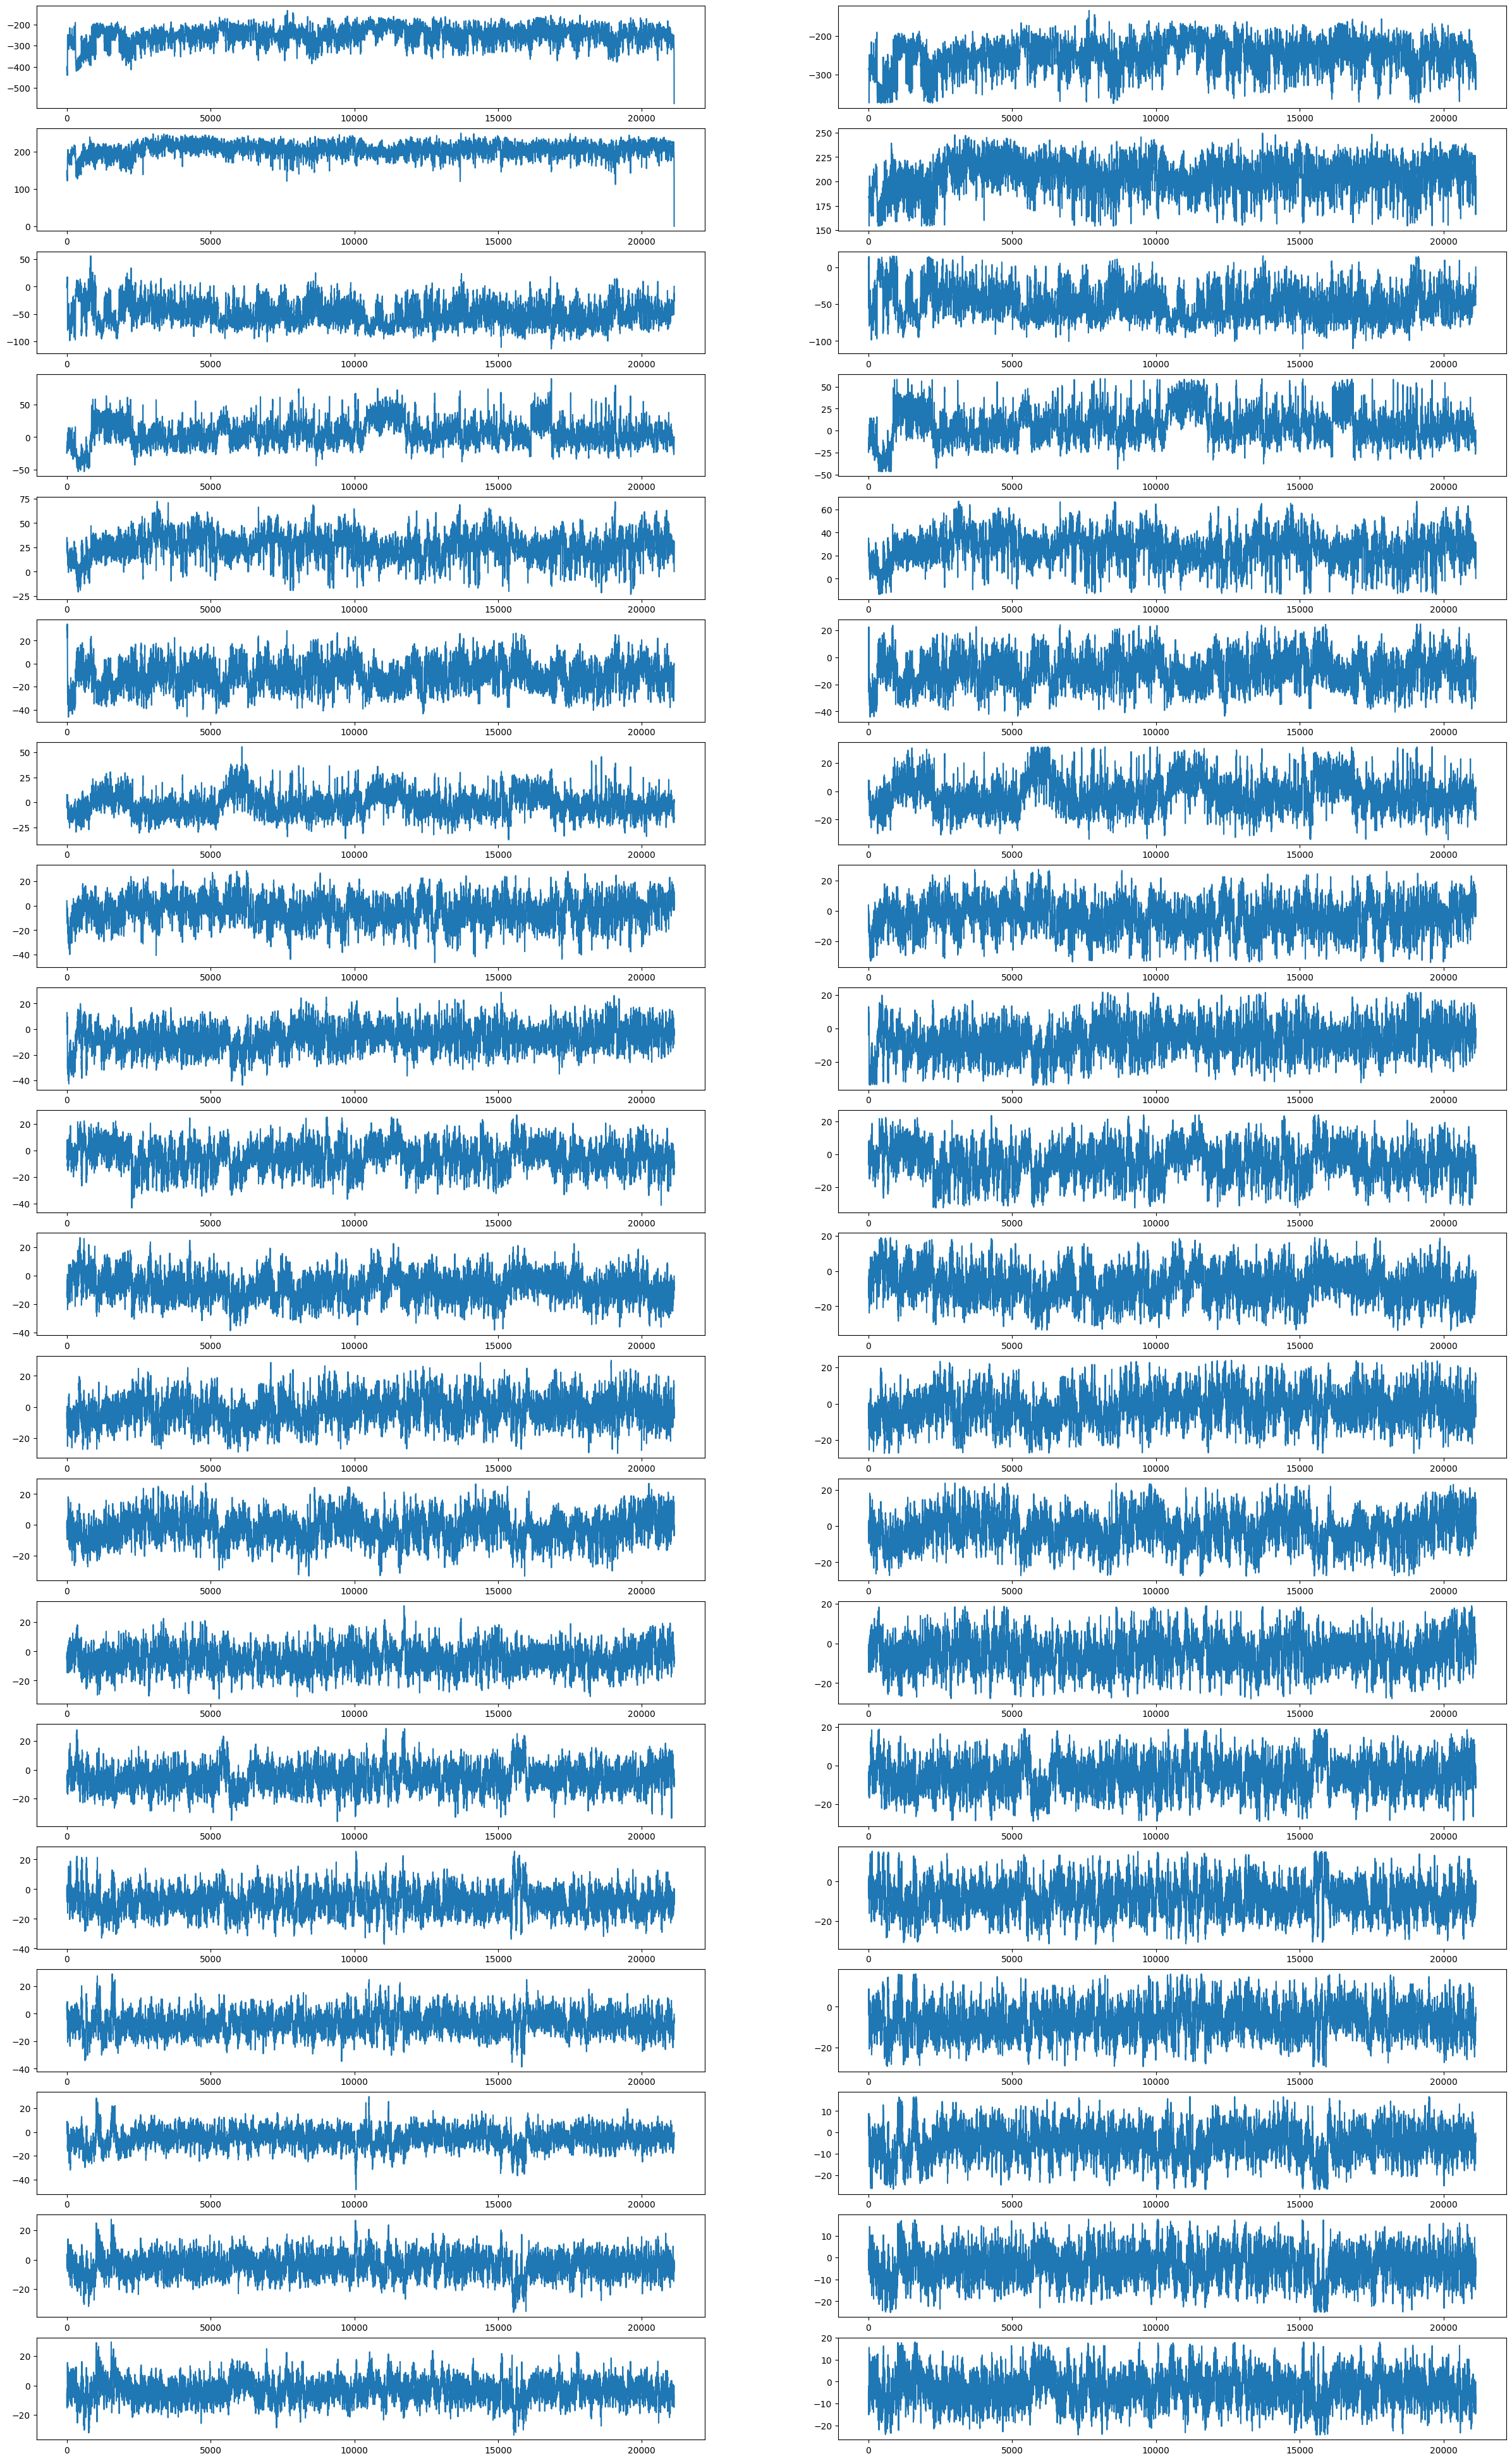

In [168]:
fig = plt.figure(figsize=(30, 50))
for i in tqdm(range(20)):
    plt.subplot(20, 2, 2*i+1)
    plt.plot(df[i])
    plt.subplot(20, 2, 2*i+2)
    plt.plot(df[f'{i}_cleaned'])
plt.show()

In [169]:
def calculate_variance(n):
    return df[f'{n}_cleaned'].var()/df[f'{n}_cleaned'].mean()**2

In [170]:
df2 = df.copy() # Just the cleaned columns
df2.columns = df2.columns.astype(str)
cleaned_columns = [col for col in df2.columns if col.endswith('_cleaned')]
df2 = df2[cleaned_columns]
df2.columns = [col[:-8] for col in df2.columns]  
df2.reset_index(drop=True, inplace=True)
df2.columns = df2.columns.astype(int)

In [171]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-286.204131,183.647230,2.626810,-21.323338,22.312069,-25.468618,7.538061,3.851788,5.976318,-4.258420,-11.583037,-6.857969,-1.742800,-3.591608,-7.130677,-4.901564,3.238728,8.444813,3.686886,-5.259263
1,-286.161099,183.742200,-2.128265,-24.805637,28.135742,-25.469467,0.071327,-1.027987,5.926413,-5.829715,-11.831057,-3.247251,-0.973314,-5.524043,-4.319493,0.350117,4.566829,7.450075,2.083207,-8.409768
2,-286.124890,183.848260,3.656887,-18.188307,33.360863,-25.444255,-5.581029,-8.483551,5.278014,-2.465994,-12.496934,-5.061634,2.466172,-0.775390,-3.320422,1.340154,7.261789,6.360527,-3.168479,-11.382816
3,-286.040756,183.938571,7.937378,-13.677288,35.179222,-25.445326,-3.859393,-7.910658,6.781340,-0.243907,-15.167213,-13.605923,-4.936214,-3.813900,-6.122549,-2.617958,4.889249,5.127290,-5.322952,-14.205949
4,-285.879193,184.028914,6.562617,-17.891598,28.746410,-25.457874,-3.790289,-6.260428,6.250435,-1.714005,-14.611926,-12.196476,-5.462772,-5.665349,-8.129169,-7.066678,-2.943285,-1.058969,-5.694245,-12.422527


In [176]:
df3 = df2.copy()

In [177]:
def standardization_column(n):
    mean = df2[n].mean()
    std = df2[n].std()
    df3[n] = (df2[n] - mean) / std

In [178]:
for i in range(0):
    standardization_column(i)

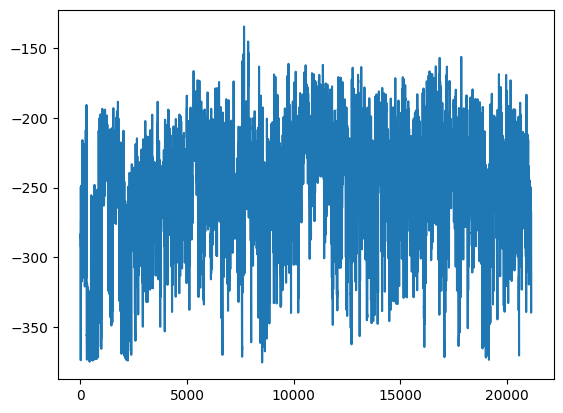

In [179]:
plt.plot(df3[0])

In [181]:
df4 = df3.copy()
df4 = df4.transpose()
df4.head()

,0,1,2,3,4,5,6,7,8,9,...,21116,21117,21118,21119,21120,21121,21122,21123,21124,21125
0,-286.204131,-286.161099,-286.124890,-286.040756,-285.879193,-285.657329,-285.409546,-285.132392,-284.836219,-284.557174,...,-282.661530,-293.030550,-304.229740,-310.689180,-318.925540,-334.785700,-338.854700,-339.807460,-267.857809,-267.823482
1,183.647230,183.742200,183.848260,183.938571,184.028914,184.106615,184.172971,184.242215,184.326074,184.435727,...,200.272230,199.434480,196.301640,194.184600,192.803850,184.488830,171.273640,166.114550,205.398116,205.389021
2,2.626810,-2.128265,3.656887,7.937378,6.562617,6.713026,4.173331,4.530759,2.233318,2.347100,...,-49.089310,-39.403618,-32.885338,-27.509872,-18.930986,-12.149527,-25.312986,-26.683610,-2.232697,0.471878
3,-21.323338,-24.805637,-18.188307,-13.677288,-17.891598,-18.683395,-19.945114,-16.583588,-17.625760,-16.952171,...,-24.159380,-21.127552,-20.965378,-16.215292,-11.266441,-6.490153,-7.905975,-2.723091,-6.217731,0.362574
4,22.312069,28.135742,33.360863,35.179222,28.746410,24.993067,26.291533,30.185385,30.437756,28.760666,...,13.977806,17.079697,18.138044,23.035412,27.830410,31.530022,30.801147,29.799873,21.192066,0.231914


In [188]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure you remove any constant or duplicate columns from df4 first

X = df4.copy()
X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Remove the constant term from VIF results
vif_data = vif_data[vif_data["feature"] != "const"]

print("VIF Analysis Results:")
print(vif_data)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


KeyboardInterrupt: 

In [201]:
df5 = df4.copy()
df5 = df5.transpose()

Explained Variance Ratio:
Principal Component 1: 0.1424
Principal Component 2: 0.1286
Principal Component 3: 0.1167
Principal Component 4: 0.0884
Principal Component 5: 0.0833
Principal Component 6: 0.0681
Principal Component 7: 0.0646
Principal Component 8: 0.0588
Principal Component 9: 0.0539
Principal Component 10: 0.0459
Principal Component 11: 0.0322
Principal Component 12: 0.0299
Principal Component 13: 0.0265
Principal Component 14: 0.0187
Principal Component 15: 0.0159
Principal Component 16: 0.0132
Principal Component 17: 0.0073
Principal Component 18: 0.0028
Principal Component 19: 0.0017
Principal Component 20: 0.0012


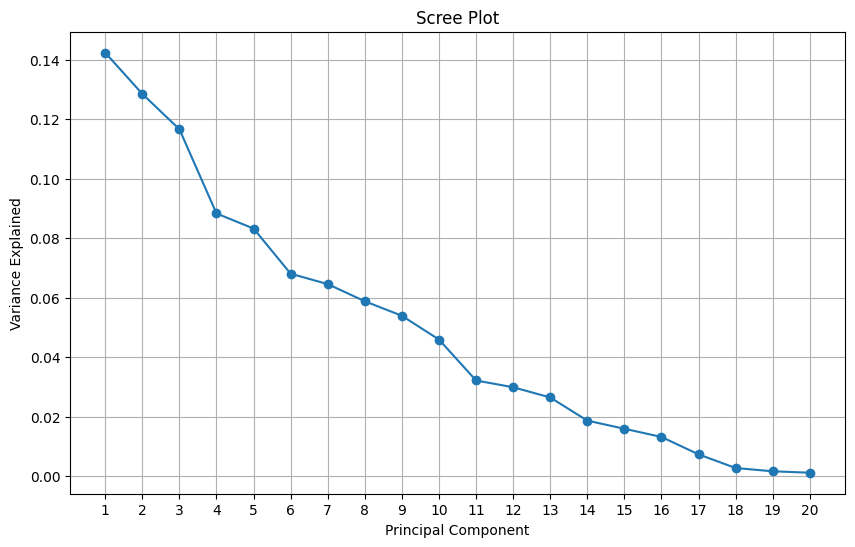

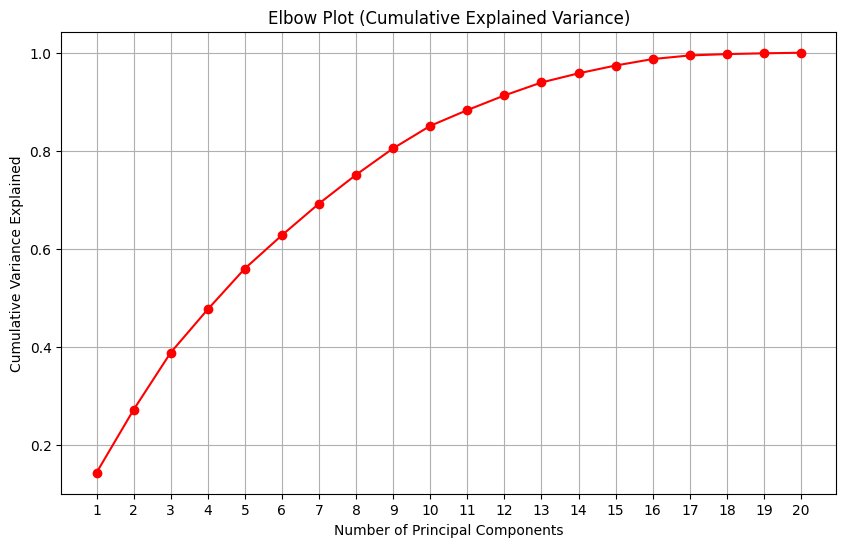

Number of components that explain 95% variance: 14


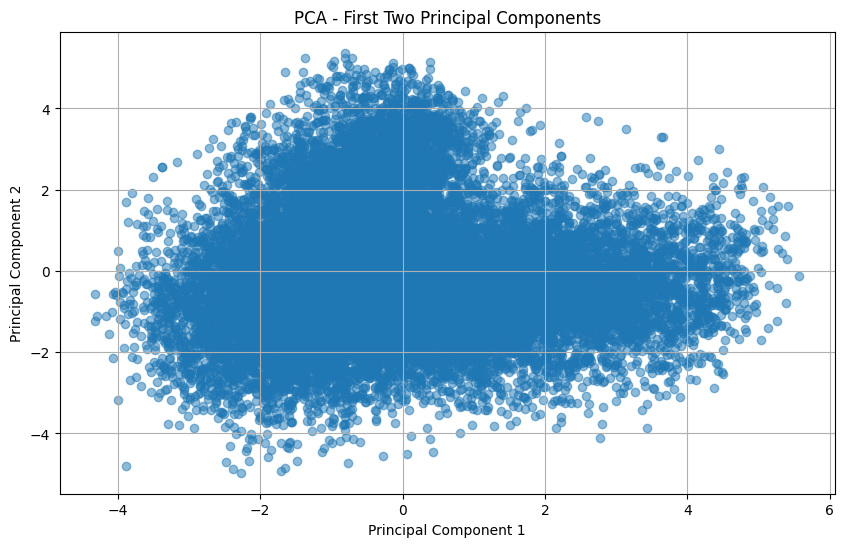

In [202]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df5 is your DataFrame
# Step 1: Standardize the data
scaler = StandardScaler()

# Remove rows with missing values
df5_cleaned = df5.dropna()

# Proceed with standardization and PCA
scaler = StandardScaler()
df5_scaled = scaler.fit_transform(df5_cleaned)

pca = PCA()
pca.fit(df5_scaled)

df5_scaled = scaler.fit_transform(df5_cleaned)

# Step 2: Perform PCA
pca = PCA()
pca.fit(df5_scaled)

# Step 3: Explained variance
explained_variance = pca.explained_variance_ratio_

# Print the explained variance
print("Explained Variance Ratio:")
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.4f}")

# Step 4: Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Step 5: Elbow plot (cumulative explained variance)
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red')
plt.title('Elbow Plot (Cumulative Explained Variance)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.show()

# Step 6: Select the number of components that explain 95% of the variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components = next(i for i, cum_var in enumerate(cumulative_variance) if cum_var >= 0.95) + 1

print(f"Number of components that explain 95% variance: {n_components}")


# Optional: Create a DataFrame for the principal components
pca_components = pca.transform(df5_scaled)
pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])

# 2D Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()
